In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carga del dataset

In [29]:
datos= pd.read_csv("online_shoppers_intention.csv")

In [30]:
datos.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


EDA

In [31]:
datos.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000
mean,2.313582,80.525445,0.499959,34.367431,31.533521,1186.276399,0.022252,0.043125,5.855664,0.062771,2.118432,2.348914,3.147273,4.061909
std,3.317367,176.022683,1.259302,141.090797,44.278528,1909.130111,0.048574,0.048689,18.463866,0.200872,0.899959,1.692162,2.397493,4.004295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.214286,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.625000,0.000000,0.000000,18.000000,595.000000,0.003077,0.025109,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.966667,0.000000,0.000000,37.500000,1459.276429,0.016928,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [32]:
datos.shape

(12067, 18)

In [33]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12067 entries, 0 to 12066
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12067 non-null  int64  
 1   Administrative_Duration  12067 non-null  float64
 2   Informational            12067 non-null  int64  
 3   Informational_Duration   12067 non-null  float64
 4   ProductRelated           12067 non-null  int64  
 5   ProductRelated_Duration  12067 non-null  float64
 6   BounceRates              12066 non-null  float64
 7   ExitRates                12066 non-null  float64
 8   PageValues               12066 non-null  float64
 9   SpecialDay               12066 non-null  float64
 10  Month                    12066 non-null  object 
 11  OperatingSystems         12066 non-null  float64
 12  Browser                  12066 non-null  float64
 13  Region                   12066 non-null  float64
 14  TrafficType           

<Figure size 1000x500 with 0 Axes>

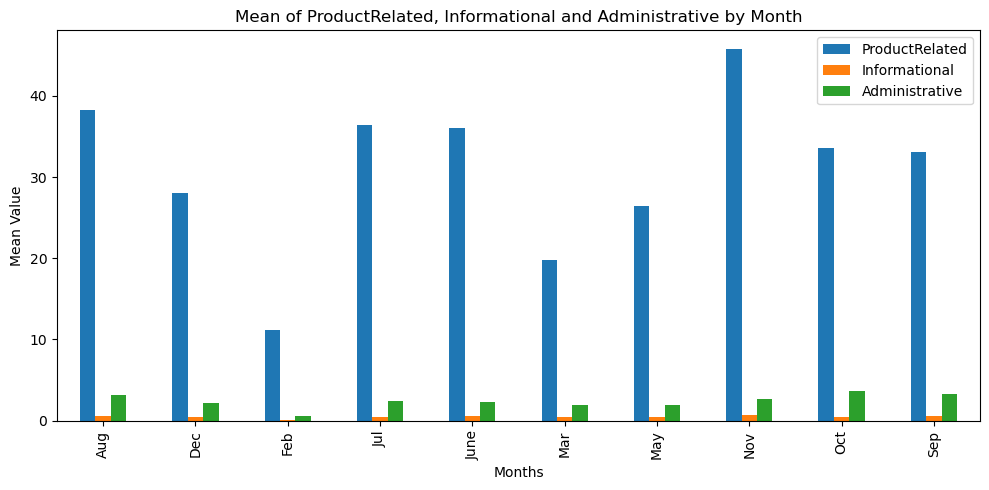

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

datos.groupby("Month")[["ProductRelated", "Informational", "Administrative"]].mean().plot(
    kind="bar", 
    figsize=(10,5)
)

plt.xlabel("Months")
plt.ylabel("Mean Value")
plt.title("Mean of ProductRelated, Informational and Administrative by Month")
plt.tight_layout()
plt.show()


## Este mapa de calor, correlaciona las variables numéricas.
Los valores cercanos a 1 indican una relación positiva fuerte; los valores cercanos a -1 una relación negativa fuerte.


PageValues y Revenue están altamente relacionados, lo cual confirma su importancia para predecir compra.

BounceRates y ExitRates tienen correlación moderada, lo que es lógico porque ambas miden abandono.

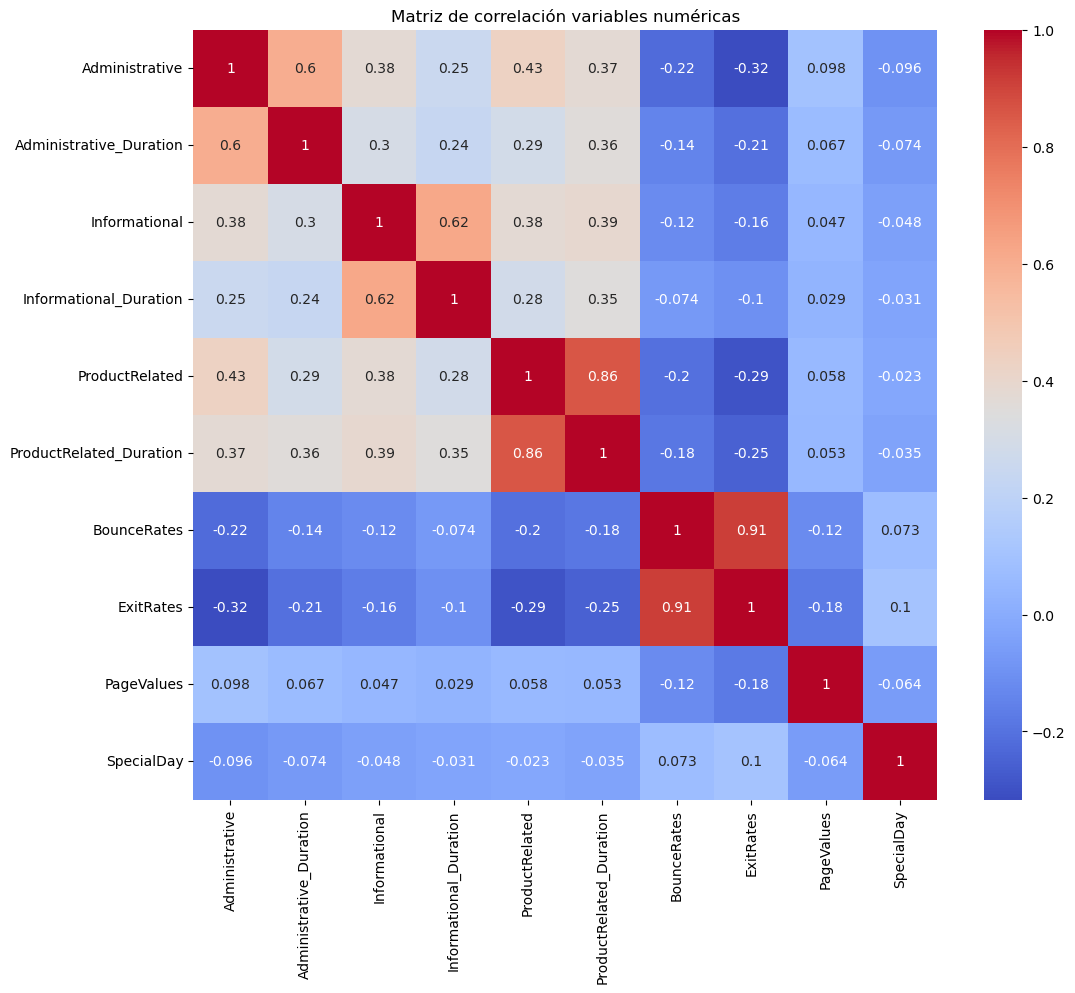

In [ ]:

plt.figure(figsize=(12,10))
sns.heatmap(datos.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación variables numéricas")
plt.show()


## Los navegadores utilizados para acceder a la página: 
Este gráfico nos ayuda a conocer qué browsers son los más utilizados por los usuarios, para ayudarnos a tomar la decisión de en cuales hace falta una mayor promoción.

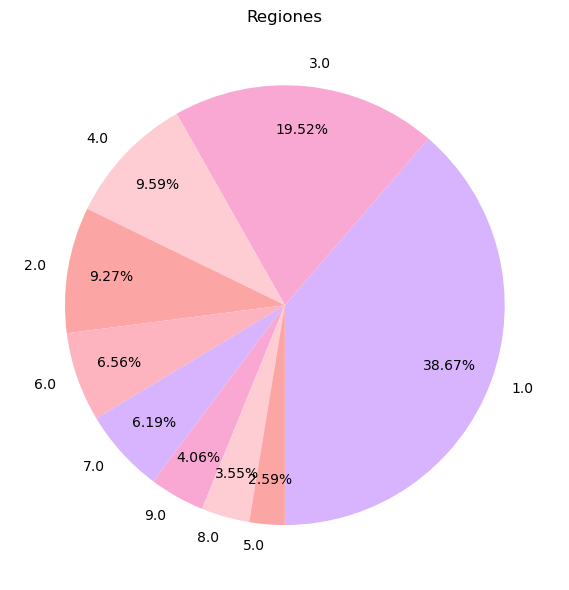

In [ ]:
tipo = datos["Region"].value_counts()

plt.figure(figsize=(6,6))

colores_pastel = [
    "#d8b4fe",
    "#f9a8d4",
    "#fecdd3", 
    "#fca5a5",
    "#fdb4bf"   
]

plt.pie(
    autopct='%1.2f%%',
    startangle=-450,
    pctdistance=0.8,
    labeldistance=1.1,
    colors=colores_pastel
)

plt.title("Regiones")
plt.tight_layout()
plt.show()

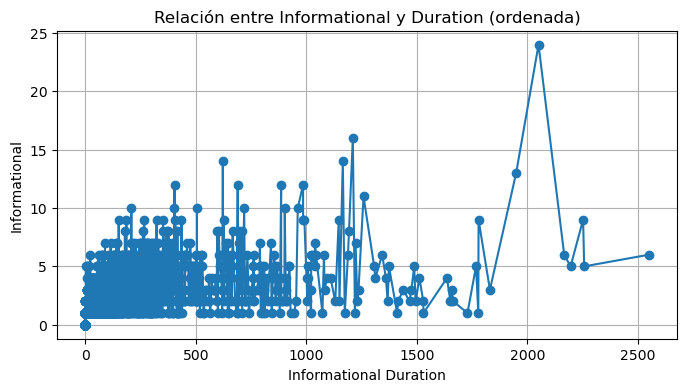

In [41]:

grupo = datos.groupby("VisitorType")[["Administrative"]]
df = datos.sort_values("Informational_Duration")

plt.figure(figsize=(8, 4))
plt.plot(df["Informational_Duration"], df["Informational"], marker="o")
plt.xlabel("Informational Duration")
plt.ylabel("Informational")
plt.title("Relación entre Informational y Duration (ordenada)")
plt.grid()
plt.show()



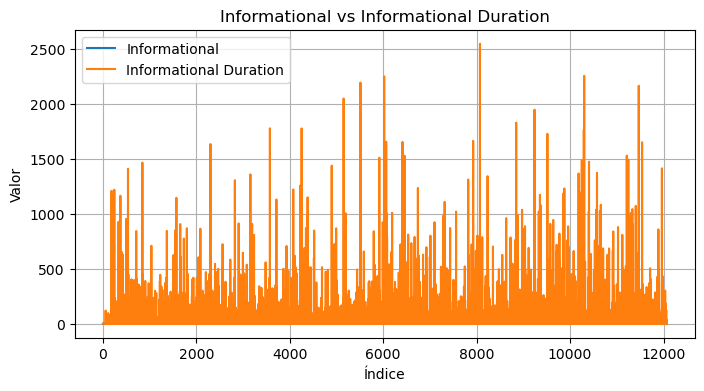

In [ ]:
grupo = datos.groupby("VisitorType")[["Administrative"]]
df = datos.sort_values("Administrative_Duration")

plt.figure(figsize=(8, 4))
plt.plot(df["Administrative_Duration"], df["Administrative"], marker="o")
plt.xlabel("Administrative Duration")
plt.ylabel("Administrative")
plt.title("Relación entre Administrative y Duration (ordenada)")
plt.grid()
plt.show()


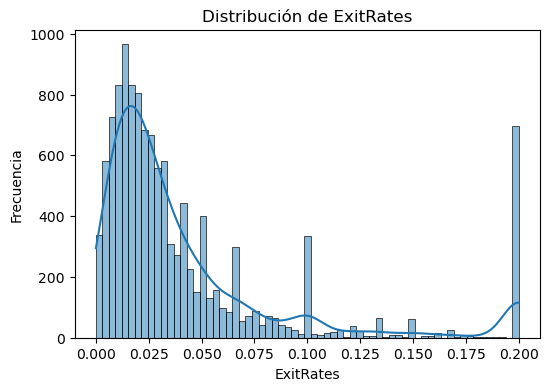

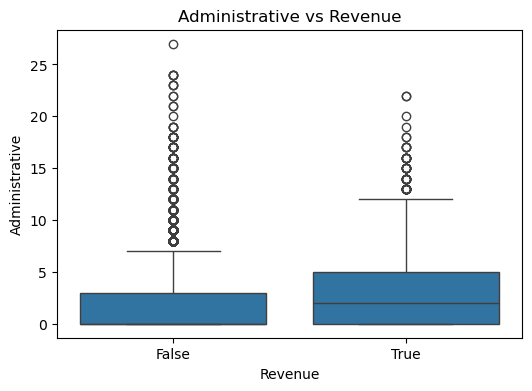

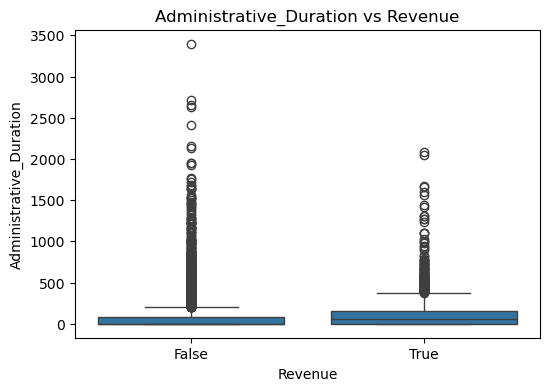

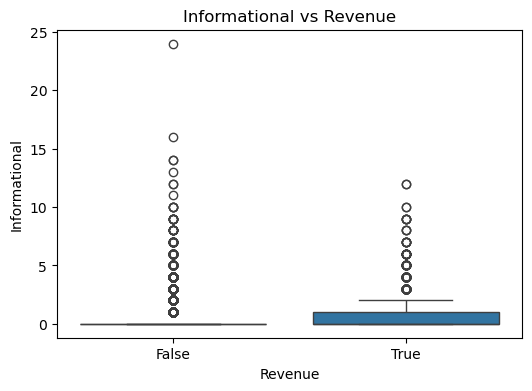

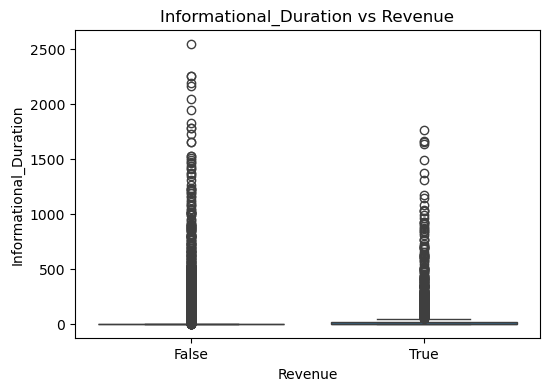

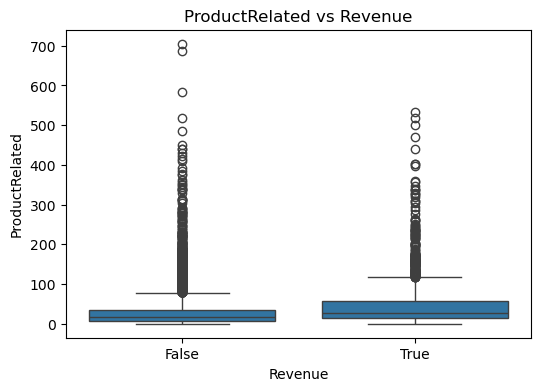

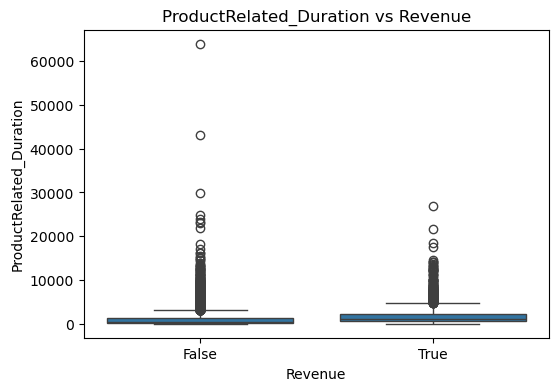

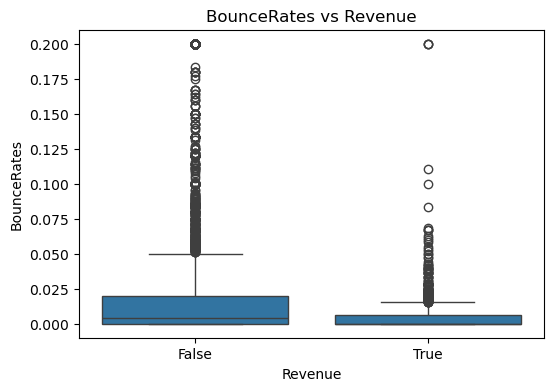

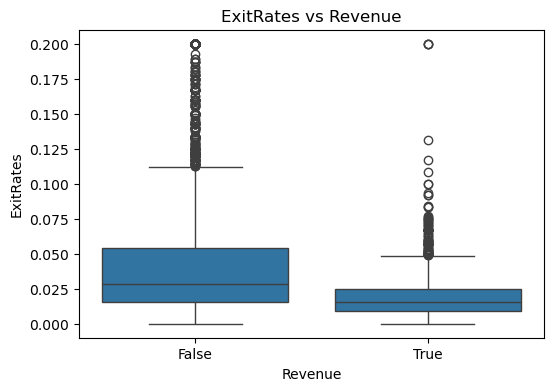

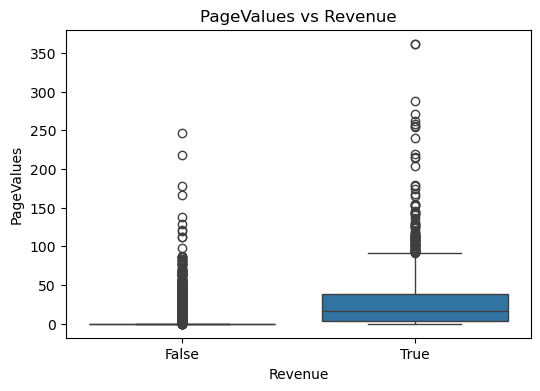

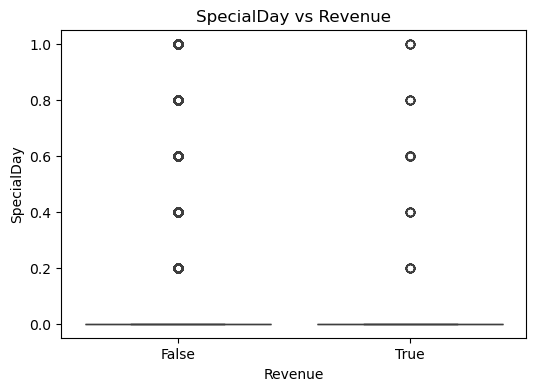

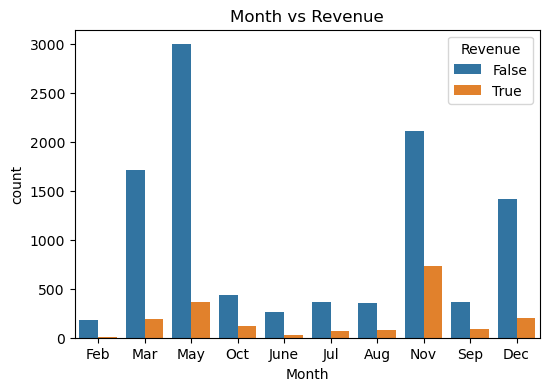

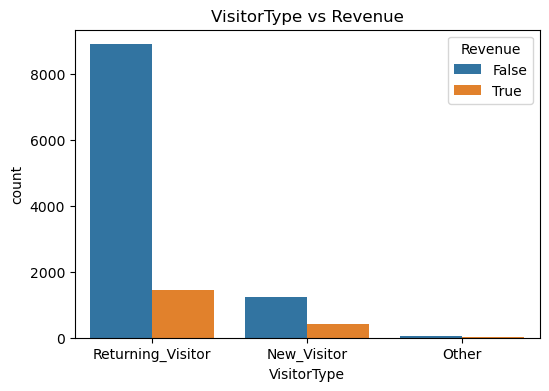

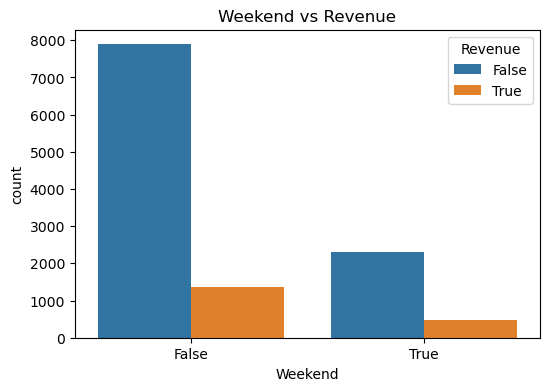

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [ 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay' ]

#distribución de ExitRates

plt.figure(figsize=(6,4))
sns.histplot(datos['ExitRates'], kde=True)
plt.title("Distribución de ExitRates")
plt.xlabel("ExitRates")
plt.ylabel("Frecuencia")
plt.show()


# relacion entre varias variables y Revenue

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Revenue", y=col, data=datos)
    plt.title(f"{col} vs Revenue")
    plt.show()

cat_for_revenue = ['Month', 'VisitorType', 'Weekend']
for col in cat_for_revenue:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Revenue", data=datos)
    plt.title(f"{col} vs Revenue")
    plt.show()


